In [54]:
from pathlib import Path
desktop_path = Path.home() / "Desktop"
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{desktop_path}\RA\penicilin\Libaries')

import reload_lib as rl

import main as m
from results_figures import *

# from main import main as m
rl.reload_lib(m)

In [55]:
import pandas as pd
import numpy as np
from pathlib import Path

In [56]:
matching_database = "ev391cutoff"

In [57]:
rl.reload_lib(m)


In [58]:
rl.reload_lib(m)
init = m.main()
db = init.db
# init.import_databases(reload=True)

In [48]:
init.results_path

'C:\\Users\\ruw\\Desktop\\RA\\penicillin_results'

In [46]:
init.path_github

'c:\\Users\\ruw\\Desktop\\RA\\penicilin'

In [50]:
Path(init.path_github)

WindowsPath('c:/Users/ruw/Desktop/RA/penicilin')

In [22]:
path = r"c:\Users\ruw\Desktop\RA\penicillin results\LCIA\LCIA_results.xlsx"
df = init.import_LCIA_results(path, init.lcia_impact_method())
df

,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, acidification: terrestrial, terrestrial acidification potential (TAP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, climate change, global warming potential (GWP1000))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: marine, marine ecotoxicity potential (METP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, energy resources: non-renewable, fossil, fossil fuel potential (FFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, eutrophication: freshwater, freshwater eutrophication potential (FEP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, eutrophication: marine, marine eutrophication potential (MEP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, human toxicity: carcinogenic, human toxicity potential (HTPc))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, human toxicity: non-carcinogenic, human toxicity potential (HTPnc))",...,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, land use, agricultural land occupation (LOP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, material resources: metals/minerals, surplus ore potential (SOP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ozone depletion, ozone depletion potential (ODPinfinite))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, particulate matter formation, particulate matter formation potential (PMFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, water use, water consumption potential (WCP))","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: ecosystem quality, ecosystem quality)","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: human health, human health)","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: natural resources, natural resources)"
"Penicillin G, defined system",0.002456,0.904458,0.050074,0.070333,2.776688,0.293006,0.00032,0.000044,0.070161,1.013446,...,0.044580,0.018057,2.842325e-07,0.001172,0.001909,0.002040,0.007786,4.000750e-09,2.059581e-06,0.102223
"Penicillin V, defined system",0.000161,0.055728,0.002257,0.002904,0.143500,0.015258,0.00003,0.000006,0.003236,0.055219,...,0.002512,0.000681,4.026882e-08,0.000093,0.000110,0.000113,0.000793,2.507648e-10,1.356154e-07,0.003871


In [23]:
ic_gwp = init.lcia_impact_method()[1]
df_gwp = df[ic_gwp]
df_gwp

Penicillin G, defined system    0.904458
Penicillin V, defined system    0.055728
Name: (ReCiPe 2016 v1.03, midpoint (H) - no biogenic, climate change, global warming potential (GWP1000)), dtype: float64

In [24]:
idx_gwp = list(df_gwp.index)
idx_gwp

['Penicillin G, defined system', 'Penicillin V, defined system']

In [25]:
idx_lst = [
    "IV",
    "Oral",
    "Combined"
]

df_pneumonia = pd.DataFrame(0, index=idx_lst, columns=[ic_gwp], dtype=object)
df_pneumonia

,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, climate change, global warming potential (GWP1000))"
IV,0
Oral,0
Combined,0


In [26]:
days = 5
daily_adminstrations = 4
adminstrations = days * daily_adminstrations

days_com_dct = {
    idx_lst[0] : 2,
    idx_lst[1] : 3
}

days_com_dct

{'IV': 2, 'Oral': 3}

In [27]:
for idx, row in df_pneumonia.iterrows():
    if "IV" in idx:
        row[ic_gwp] = df_gwp.at[idx_gwp[0]] * adminstrations
    elif "Oral" in idx:
        row[ic_gwp] = df_gwp.at[idx_gwp[1]] * adminstrations
    else:
        dct = {}
        for x, (key, item) in enumerate(days_com_dct.items()):
            dct[key] = df_gwp.at[idx_gwp[x]] * item * daily_adminstrations
        row[ic_gwp] = dct

df_pneumonia

,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, climate change, global warming potential (GWP1000))"
IV,18.089169
Oral,1.11455
Combined,"{'IV': 7.235667430123225, 'Oral': 0.6687300195..."


In [28]:
iv = df_pneumonia.at[idx_lst[0], ic_gwp]
oral = df_pneumonia.at[idx_lst[1], ic_gwp]
comb  = df_pneumonia.at[idx_lst[2], ic_gwp]
comb_val = np.array(list(comb.values()))
comb_sum = comb_val.sum()


print(f"{idx_lst[1]} saves {round((1-oral/iv)*100,0)}%")
print(f"{idx_lst[2]} saves {round((1-comb_sum/iv)*100,0)}%")

Oral saves 94.0%
Combined saves 56.0%


In [29]:
import matplotlib.pyplot as plt
import numpy as np


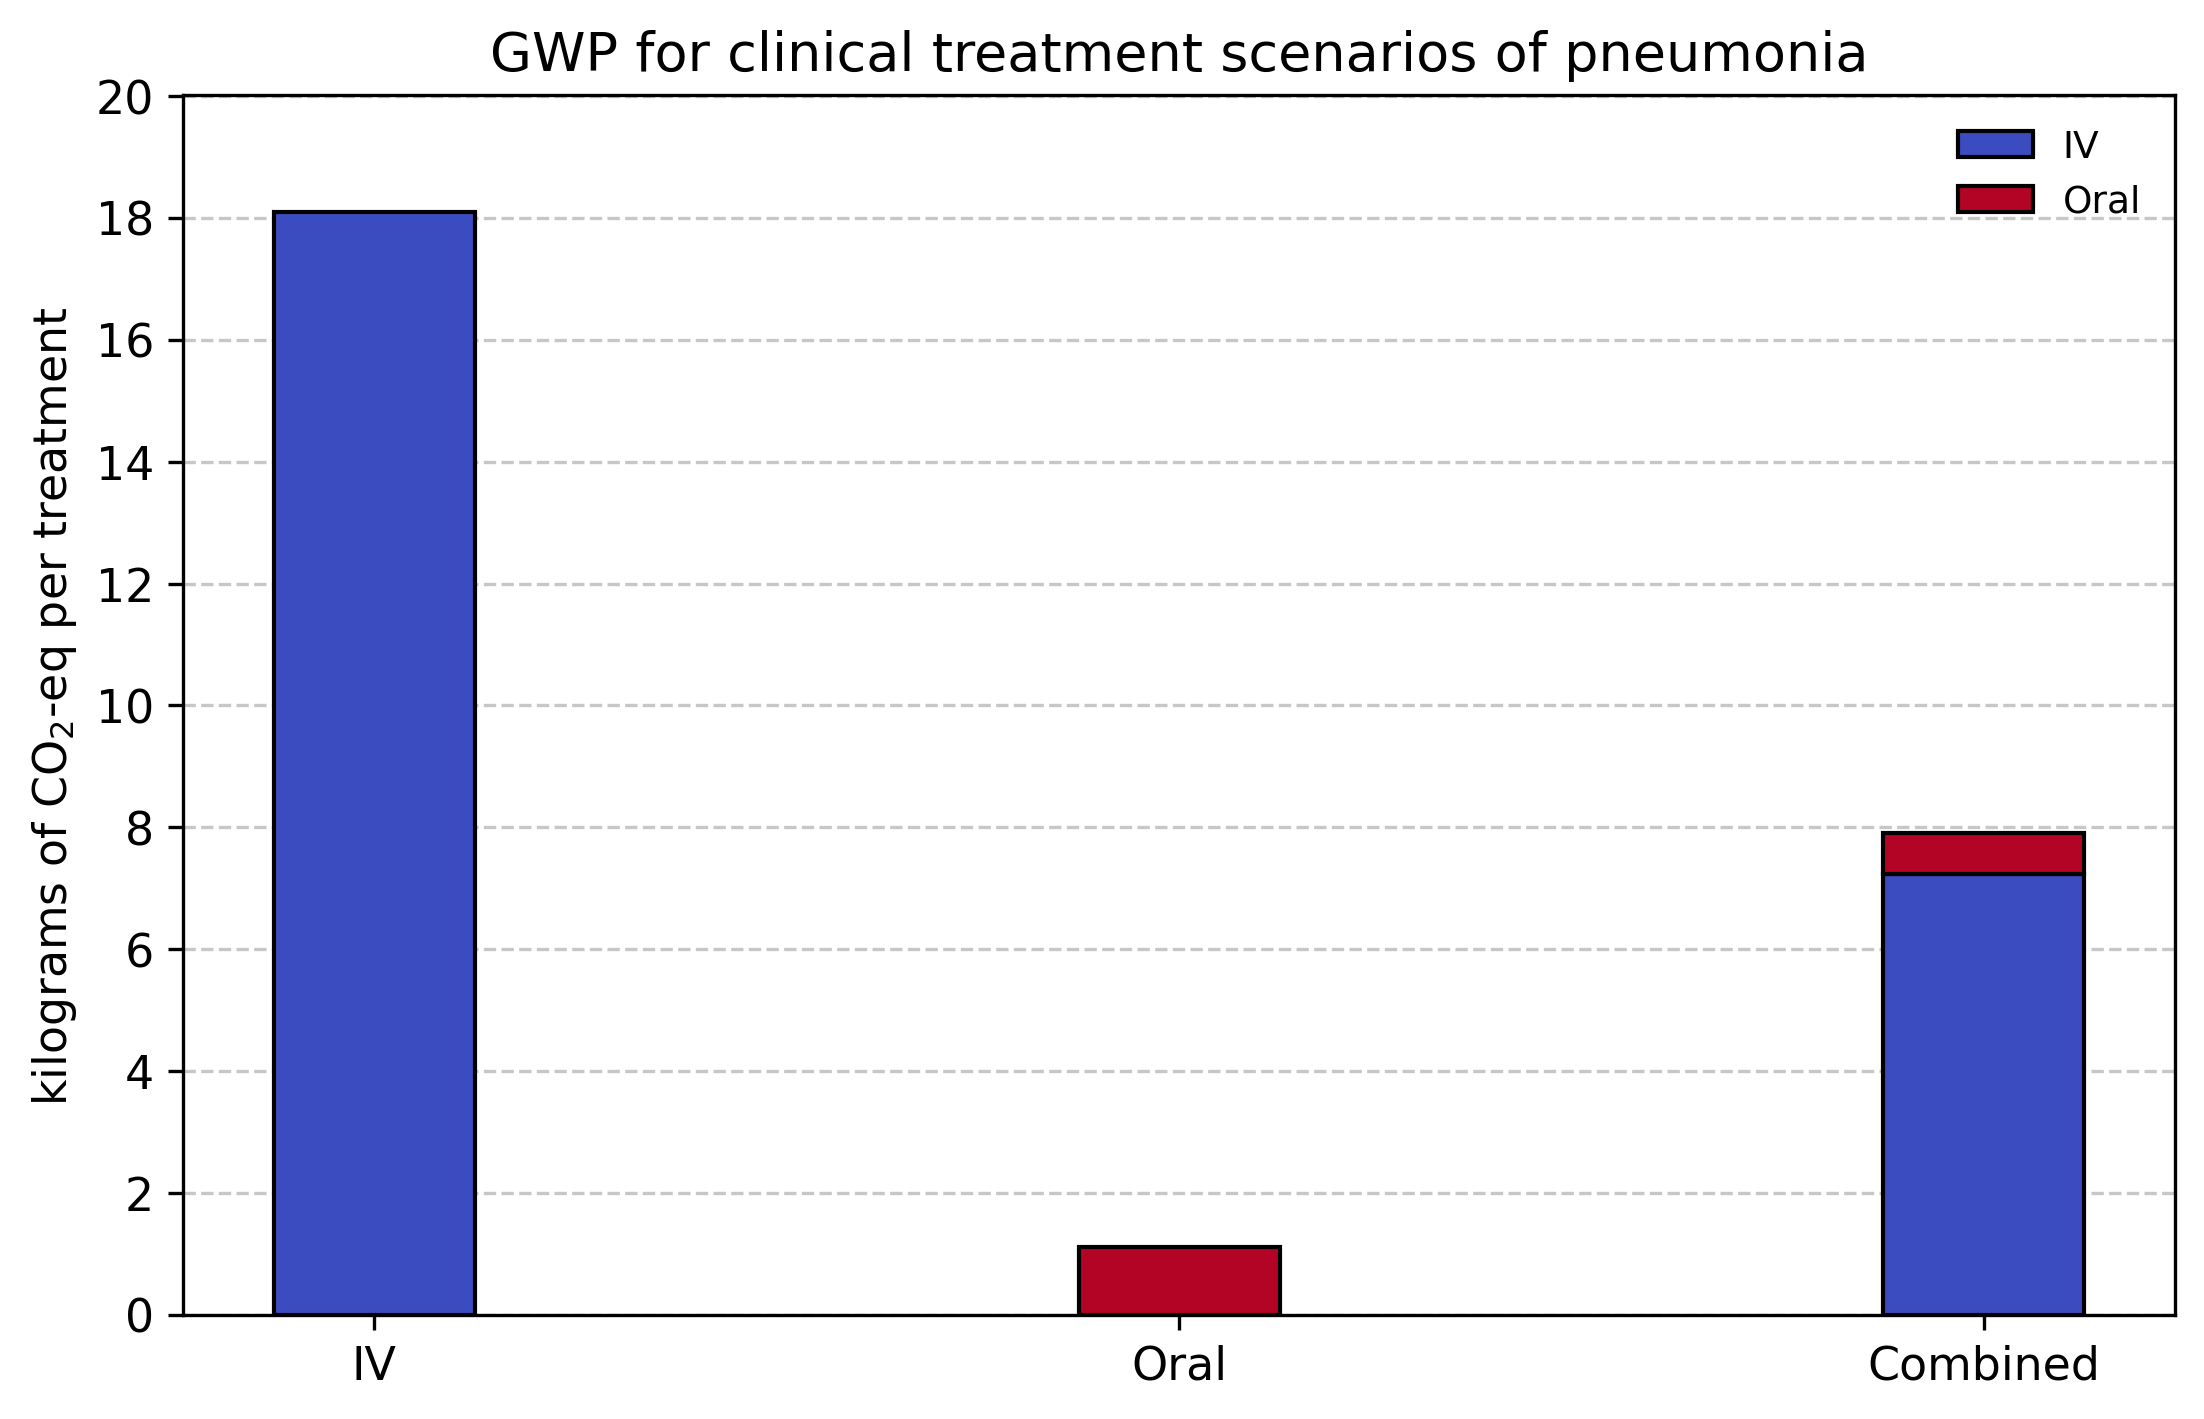

In [30]:
# Create the plot
colors = init.color_range(colorname="coolwarm", color_quantity=2)
width_in, height_in, dpi = init.plot_dimensions()
fig, ax = plt.subplots(figsize=(width_in, height_in), dpi=dpi)
bar_width = 1 / (len(idx_lst) + 1)
index = np.arange(len(df_pneumonia.index))



# Plot individual bars for the first two scenarios
for i in range(2):
    ax.bar(i, df_pneumonia.iloc[i, 0], bar_width, color=colors[i], edgecolor='k', label=df_pneumonia.index[i], zorder=2)

# Plot stacked bar for the third scenario
stack_data = df_pneumonia.iloc[2, 0]
bottom = 0
for j, (key, value) in enumerate(stack_data.items()):
    ax.bar(2, value, bar_width, bottom=bottom, color=colors[j], edgecolor='k', label=idx_lst[j],  zorder=2)
    bottom += value

# Customize the plot
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(df_pneumonia.index)
ax.set_ylabel('kilograms of CO$_2$-eq per treatment')
ax.set_title("GWP for clinical treatment scenarios of pneumonia")
y_ticks = np.linspace(0, 20, 11)
ax.set_yticks(y_ticks)
ax.set_ylim(0, 20.01)
ax.legend(
    labels=idx_lst[:2], 
    frameon=False)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=-0)
plt.tight_layout()
plot_save_path = init.join_path(init.path_github, r"figures")
output_file = init.join_path(plot_save_path, f"treatment_of_pneumonia.png")
plt.savefig(output_file, dpi=dpi, format='png', bbox_inches='tight')
plt.show()


In [53]:
def join_path(path1, *argv):
    path = Path(path1)
    for arg in argv:
        path = path / arg
    return path

In [61]:
p1 = "cd"
p2 = "ab"
p3 = "ff"
path = join_path(p1, p2)
path

WindowsPath('cd/ab')